In [39]:
# Import necessary libraries
import pandas as pd  # for data manipulation
import numpy as np   # for numerical operations
import matplotlib.pyplot as plt  # for plotting
import seaborn as sns  # for visualization
from sklearn.preprocessing import StandardScaler  # for feature scaling
from sklearn.cluster import KMeans  # KMeans clustering algorithm
from sklearn.metrics import silhouette_score  # to evaluate clustering

In [40]:
# Install and import kagglehub
!pip install kagglehub
import kagglehub

# Download the dataset from Kaggle
path = kagglehub.dataset_download("arjunbhasin2013/ccdata")

# Display the path of the downloaded dataset
print("Path to dataset files:", path)

Path to dataset files: /root/.cache/kagglehub/datasets/arjunbhasin2013/ccdata/versions/1


In [41]:
# Load the dataset into a DataFrame
df = pd.read_csv(path + '/CC GENERAL.csv')

# Display the first five rows of the dataset
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [42]:

# Remove the 'CUST_ID' column as it is not needed for clustering
df = df.drop('CUST_ID', axis=1)

# Check for missing values
df.isnull().sum()

# Filling missing values with column means
df.fillna(df.mean(), inplace=True)


# Normalize the data using StandardScaler
scaler = StandardScaler()
scaled_df = scaler.fit_transform(df)

# Convert scaled data back to DataFrame for readability
scaled_df = pd.DataFrame(scaled_df, columns=df.columns)

# Display the first five rows of the scaled data
scaled_df.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,-0.731989,-0.249434,-0.424900,-0.356934,-0.349079,-0.466786,-0.806490,-0.678661,-0.707313,-0.675349,-0.476070,-0.511333,-0.960433,-0.528979,-3.109675e-01,-0.525551,0.36068
1,0.786961,0.134325,-0.469552,-0.356934,-0.454576,2.605605,-1.221758,-0.678661,-0.916995,0.573963,0.110074,-0.591796,0.688639,0.818642,8.931021e-02,0.234227,0.36068
2,0.447135,0.518084,-0.107668,0.108889,-0.454576,-0.466786,1.269843,2.673451,-0.916995,-0.675349,-0.476070,-0.109020,0.826062,-0.383805,-1.016632e-01,-0.525551,0.36068
3,0.049099,-1.016953,0.232058,0.546189,-0.454576,-0.368653,-1.014125,-0.399319,-0.916995,-0.258913,-0.329534,-0.551565,0.826062,-0.598688,4.878305e-17,-0.525551,0.36068
4,-0.358775,0.518084,-0.462063,-0.347294,-0.454576,-0.466786,-1.014125,-0.399319,-0.916995,-0.675349,-0.476070,-0.551565,-0.905464,-0.364368,-2.657913e-01,-0.525551,0.36068


# **KMEANS Clustering**

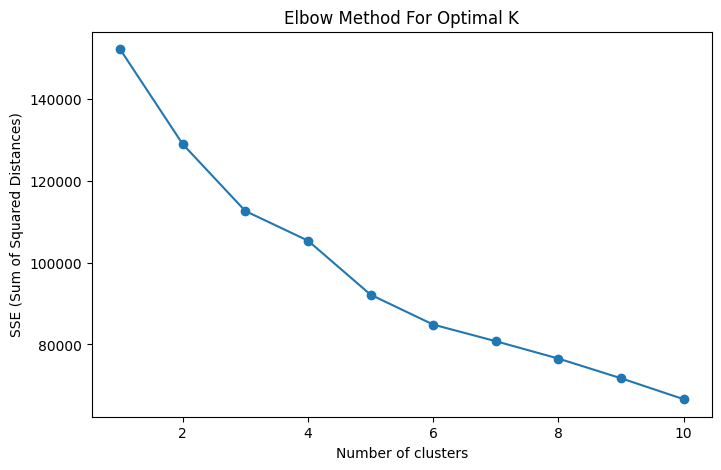

In [43]:
# Apply KMeans clustering and determine the best number of clusters using the Elbow Method
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_df)
    sse.append(kmeans.inertia_)

# Plot the Elbow curve
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), sse, marker='o')
plt.title('Elbow Method For Optimal K')
plt.xlabel('Number of clusters')
plt.ylabel('SSE (Sum of Squared Distances)')
plt.show()

In [44]:
# Fit the KMeans model with the optimal number of clusters (for example, 4)
optimal_k = 4
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans.fit(scaled_df)

# Add the cluster labels to the original DataFrame
df['Cluster'] = kmeans.labels_

# Display the first five rows with the cluster labels
df.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Cluster
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,3
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,0
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,2
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,3
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,3


In [45]:
# Calculate the silhouette score
silhouette_avg = silhouette_score(scaled_df, kmeans.labels_)
print(f'Silhouette Score: {silhouette_avg}')

Silhouette Score: 0.16639208656701637


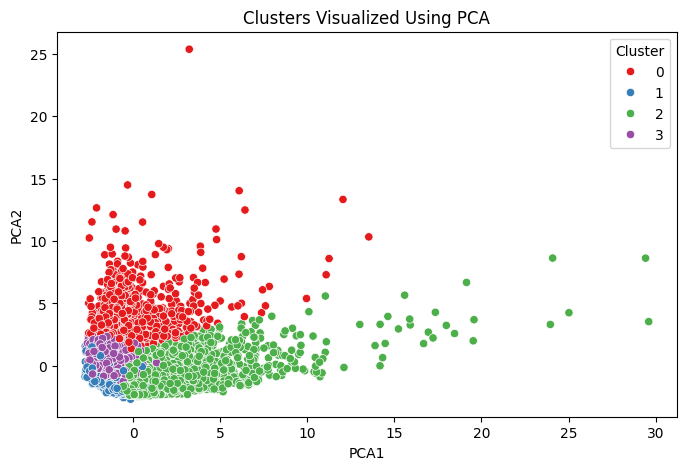

In [46]:
from sklearn.decomposition import PCA

# Reduce dimensions using PCA
pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_df)

# Create a DataFrame for the reduced data
pca_df = pd.DataFrame(pca_data, columns=['PCA1', 'PCA2'])
pca_df['Cluster'] = kmeans.labels_

# Plot the clusters
plt.figure(figsize=(8, 5))
sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', data=pca_df, palette='Set1')
plt.title('Clusters Visualized Using PCA')
plt.show()

# **DBSCAN Clustering**

In [47]:
# Import necessary libraries

import matplotlib.pyplot as plt

from sklearn.cluster import DBSCAN


# Display plots inline (for Google Colab)
%matplotlib inline


# Apply DBSCAN clustering
dbscan = DBSCAN(eps=0.5, min_samples=5)

# Fit the DBSCAN model
dbscan.fit(scaled_df)

# Get the cluster labels from DBSCAN
dbscan_labels = dbscan.labels_

# Add the cluster labels to the original dataset
df['Cluster'] = dbscan_labels

# Display the first five rows with the cluster labels
df.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Cluster
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,0
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,-1
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,-1
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,-1
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,0


In [48]:
# Calculate the silhouette score
silhouette_avg_dbscan = silhouette_score(scaled_df, dbscan_labels)
print(f'Silhouette Score (DBSCAN): {silhouette_avg_dbscan}')

Silhouette Score (DBSCAN): -0.4437013266683457


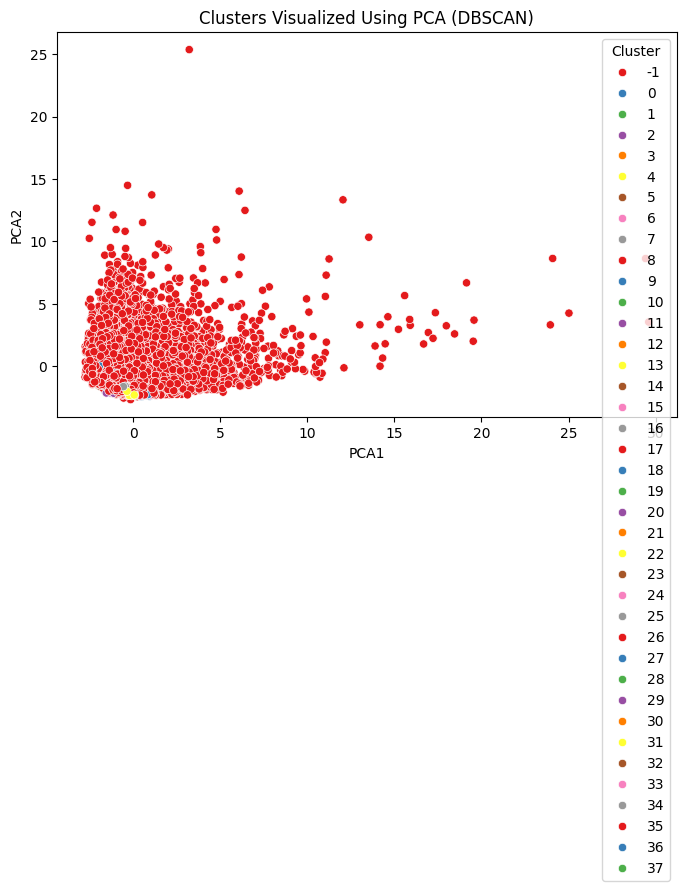

In [49]:
from sklearn.decomposition import PCA

# Reduce dimensions using PCA
pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_df)

# Create a DataFrame for the reduced data
pca_df = pd.DataFrame(pca_data, columns=['PCA1', 'PCA2'])
pca_df['Cluster'] = dbscan_labels

# Plot the clusters
plt.figure(figsize=(8, 5))
sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', data=pca_df, palette='Set1')
plt.title('Clusters Visualized Using PCA (DBSCAN)')
plt.show()

# **Agglomerative Clustering and GaussianMixture Model Clustering**


In [50]:
# Import necessary libraries

from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score

# Display plots inline (for Google Colab)
%matplotlib inline


# Apply Agglomerative Clustering
agg_clustering = AgglomerativeClustering(n_clusters=4)

# Fit the model
agg_clustering.fit(scaled_df)

# Get the cluster labels
agg_labels = agg_clustering.labels_

# Add the cluster labels to the original DataFrame
df['Agglomerative_Cluster'] = agg_labels

# Calculate the silhouette score for Agglomerative Clustering
silhouette_avg_agg = silhouette_score(scaled_df, agg_labels)
print(f'Silhouette Score (Agglomerative Clustering): {silhouette_avg_agg}')

Silhouette Score (Agglomerative Clustering): 0.1547093352037027


In [51]:
# Apply Gaussian Mixture Model Clustering
gmm = GaussianMixture(n_components=4, random_state=42)

# Fit the model
gmm.fit(scaled_df)

# Get the cluster labels from GMM
gmm_labels = gmm.predict(scaled_df)

# Add the GMM cluster labels to the original DataFrame
df['GMM_Cluster'] = gmm_labels

# Calculate the silhouette score for GMM
silhouette_avg_gmm = silhouette_score(scaled_df, gmm_labels)
print(f'Silhouette Score (Gaussian Mixture Model): {silhouette_avg_gmm}')

Silhouette Score (Gaussian Mixture Model): 0.07328304944955563


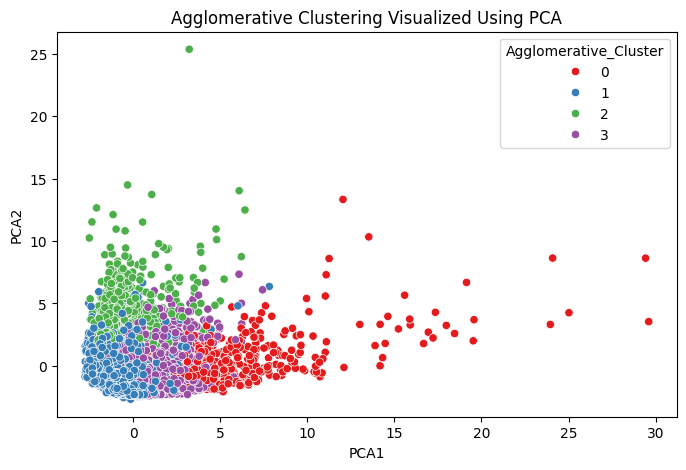

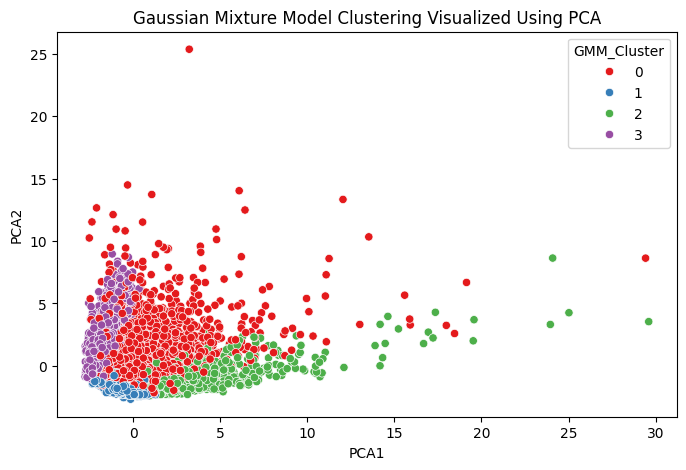

In [52]:
from sklearn.decomposition import PCA

# Reduce dimensions using PCA
pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_df)

# Create a DataFrame for the reduced data
pca_df = pd.DataFrame(pca_data, columns=['PCA1', 'PCA2'])

# Plot Agglomerative Clustering
pca_df['Agglomerative_Cluster'] = agg_labels
plt.figure(figsize=(8, 5))
sns.scatterplot(x='PCA1', y='PCA2', hue='Agglomerative_Cluster', data=pca_df, palette='Set1')
plt.title('Agglomerative Clustering Visualized Using PCA')
plt.show()

# Plot GMM Clustering
pca_df['GMM_Cluster'] = gmm_labels
plt.figure(figsize=(8, 5))
sns.scatterplot(x='PCA1', y='PCA2', hue='GMM_Cluster', data=pca_df, palette='Set1')
plt.title('Gaussian Mixture Model Clustering Visualized Using PCA')
plt.show()